In [ ]:
!pip install tensorflow_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 51.1 MB/s eta 0:00:00


In [ ]:
!pip install keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.2/572.2 kB 10.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

In [4]:
file_path = '/content/drive/MyDrive/datasets/train_essays_7_prompts.csv'

In [5]:
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,text,label
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
label_counts = data['label'].value_counts()

# Length of essays
data['essay_length'] = data['text'].apply(lambda x: len(word_tokenize(x)))

# Text Data Analysis
# Most common words
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

all_words = ' '.join(data['text']).lower()
all_words_tokens = word_tokenize(all_words)
filtered_words = [word for word in all_words_tokens if word.isalnum() and word not in stop_words]
word_freq = Counter(filtered_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


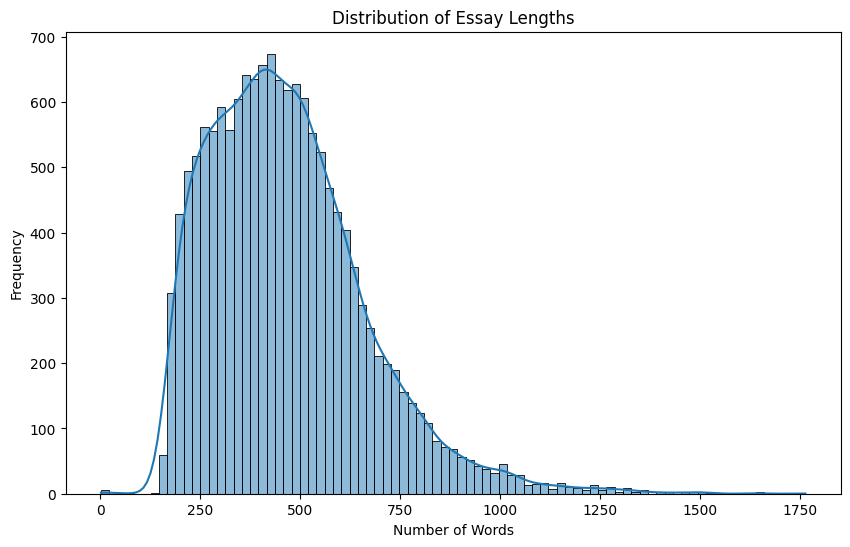

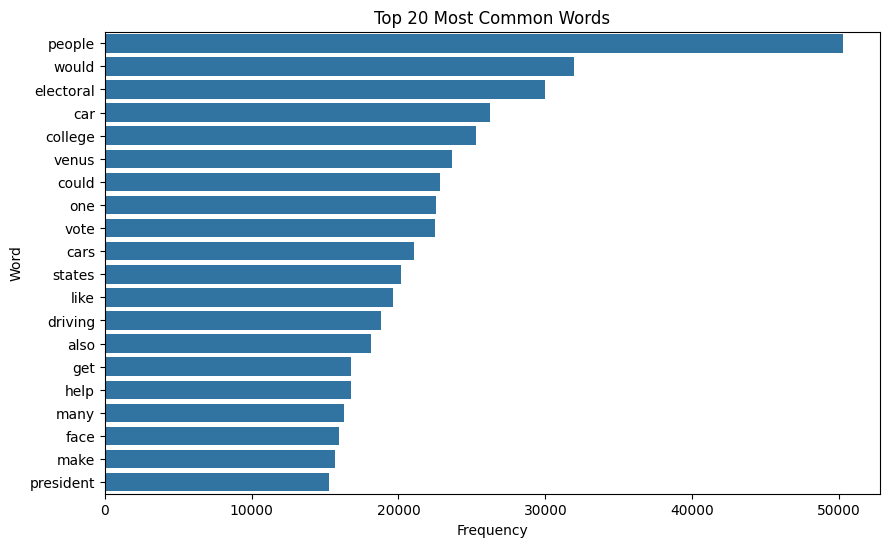

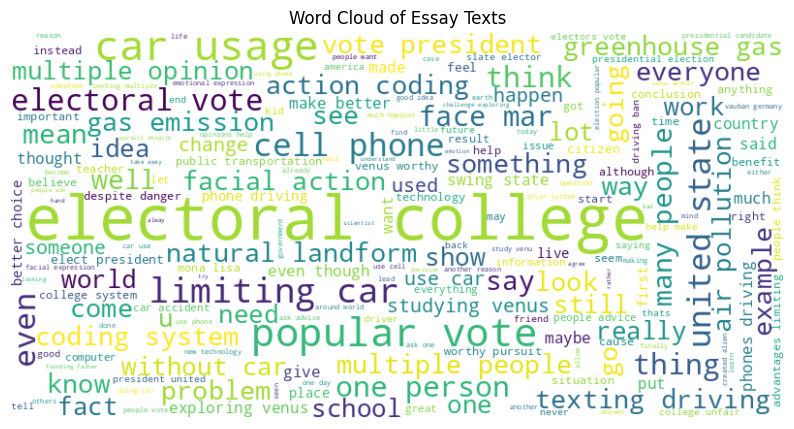

In [7]:
# Visualization
# Distribution of essay lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['essay_length'], kde=True)
plt.title('Distribution of Essay Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Bar chart for the frequency of common words
common_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df)
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Essay Texts')
plt.show()

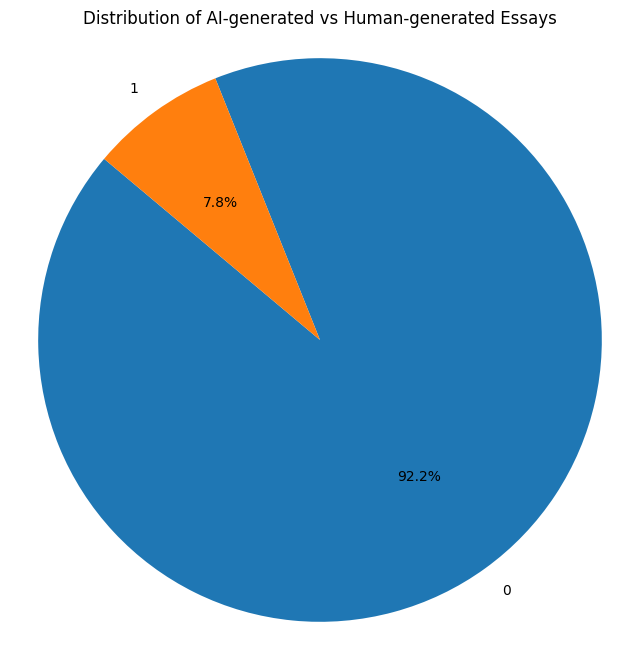

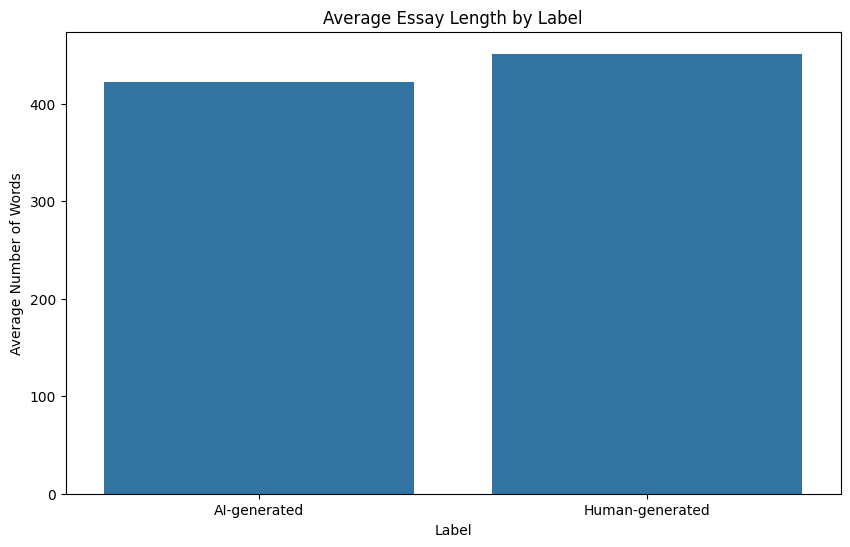

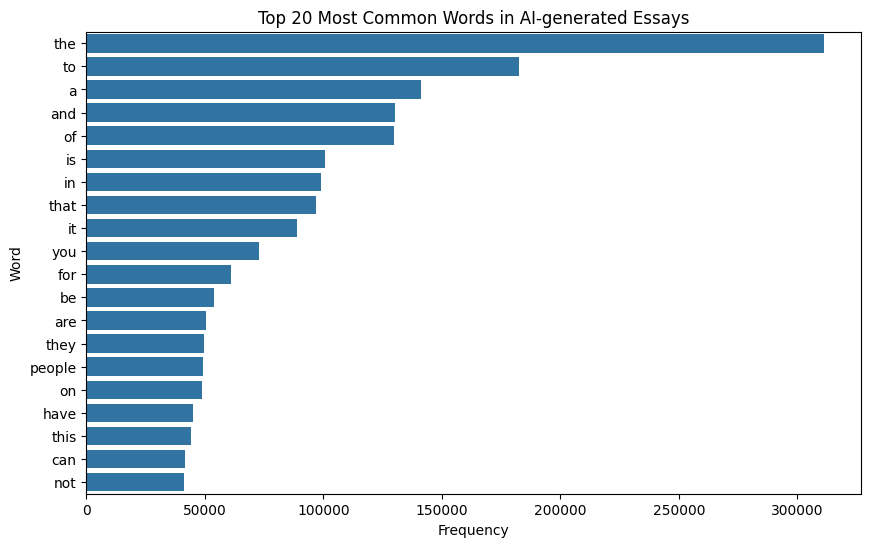

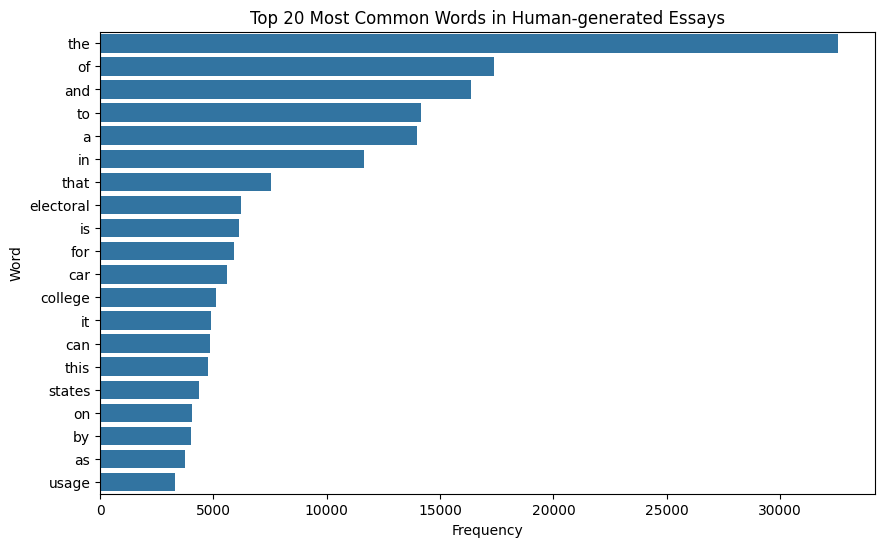

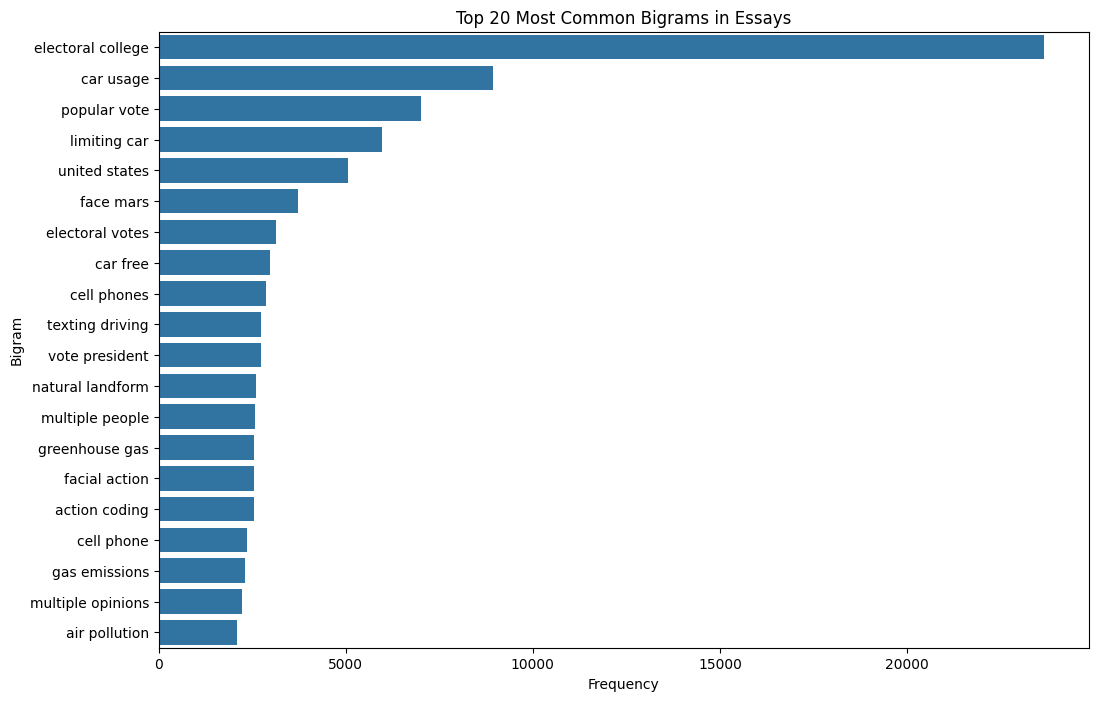

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to clean and tokenize text
def clean_and_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return tokens

# Basic Data Analysis
# Distribution of labels
label_counts = data['label'].value_counts()

# Length of essays
data['essay_length'] = data['text'].apply(lambda x: len(clean_and_tokenize(x)))

# Text Data Analysis
# Most common words
filtered_words = [word for text in data['text'] for word in clean_and_tokenize(text)]
word_freq = Counter(filtered_words)

# Visualization
# Label distribution
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of AI-generated vs Human-generated Essays')
plt.axis('equal')
plt.show()

# Average essay length by label
avg_essay_length = data.groupby('label')['essay_length'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='label', y='essay_length', data=avg_essay_length)
plt.title('Average Essay Length by Label')
plt.xlabel('Label')
plt.ylabel('Average Number of Words')
plt.xticks([0, 1], ['AI-generated', 'Human-generated'])
plt.show()

# Common words by label
ai_text = ' '.join(data[data['label'] == 0]['text'])
human_text = ' '.join(data[data['label'] == 1]['text'])

ai_words = clean_and_tokenize(ai_text)
human_words = clean_and_tokenize(human_text)

ai_word_freq = Counter(ai_words)
human_word_freq = Counter(human_words)

common_ai_words_df = pd.DataFrame(ai_word_freq.most_common(20), columns=['Word', 'Frequency'])
common_human_words_df = pd.DataFrame(human_word_freq.most_common(20), columns=['Word', 'Frequency'])

# Bar chart for the frequency of common words (AI-generated)
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_ai_words_df)
plt.title('Top 20 Most Common Words in AI-generated Essays')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Bar chart for the frequency of common words (Human-generated)
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_human_words_df)
plt.title('Top 20 Most Common Words in Human-generated Essays')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_matrix = vectorizer.fit_transform(data['text'])
bigrams = vectorizer.get_feature_names_out()
bigram_freq = bigrams_matrix.sum(axis=0).A1
bigram_freq_df = pd.DataFrame(list(zip(bigrams, bigram_freq)), columns=['Bigram', 'Frequency'])
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Bar chart for the frequency of bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=bigram_freq_df)
plt.title('Top 20 Most Common Bigrams in Essays')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
file_path = '/content/drive/MyDrive/datasets/train_essays_7_prompts.csv'

In [11]:
data = pd.read_csv(file_path)

In [12]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(data['text'])
y = data['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [15]:
# Evaluate the Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Performance:
Accuracy: 0.99
Precision: 1.00
Recall: 0.85
F1 Score: 0.92

Confusion Matrix:
[[2751    0]
 [  34  191]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2751
           1       1.00      0.85      0.92       225

    accuracy                           0.99      2976
   macro avg       0.99      0.92      0.96      2976
weighted avg       0.99      0.99      0.99      2976



In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a dataframe for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

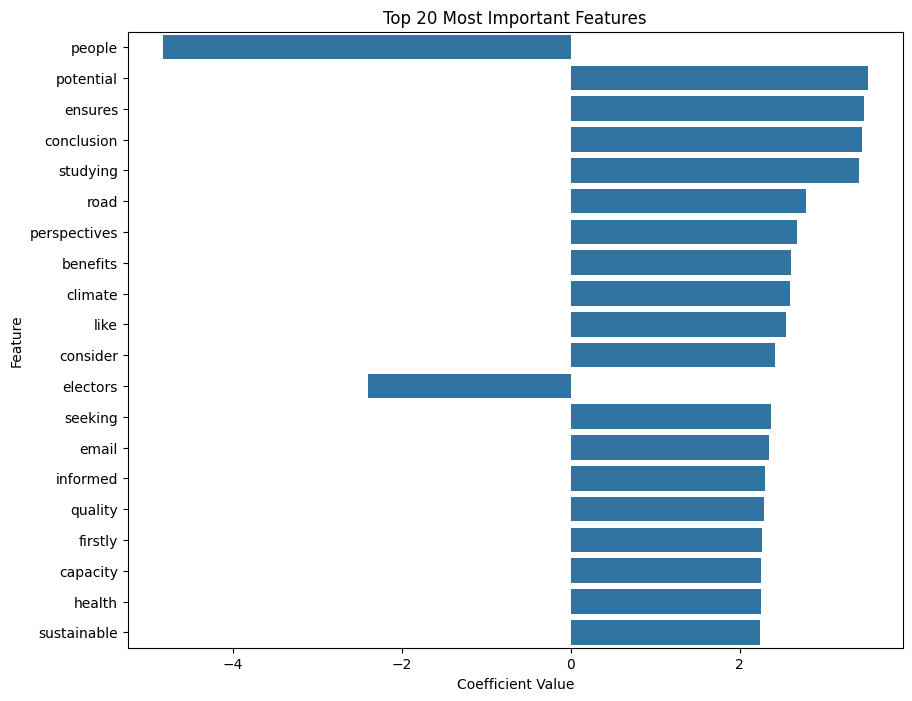

In [17]:
# Sort the dataframe by absolute value of the coefficient
feature_importances['AbsCoefficient'] = np.abs(feature_importances['Coefficient'])
feature_importances = feature_importances.sort_values(by='AbsCoefficient', ascending=False).head(20)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importances)
plt.title('Top 20 Most Important Features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

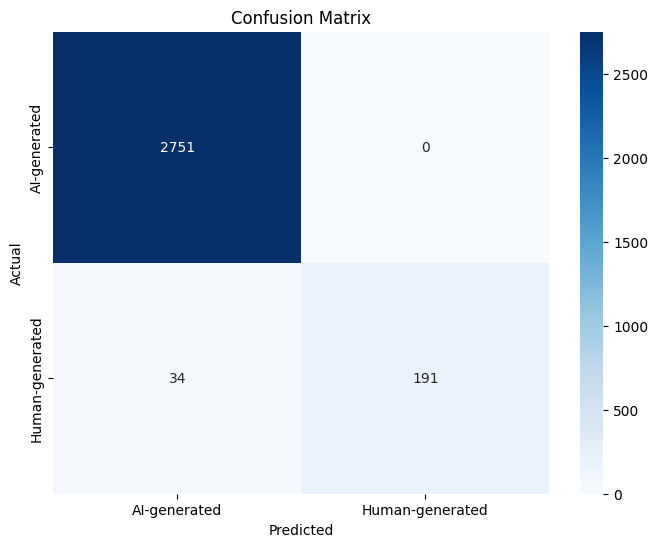

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['AI-generated', 'Human-generated'], yticklabels=['AI-generated', 'Human-generated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

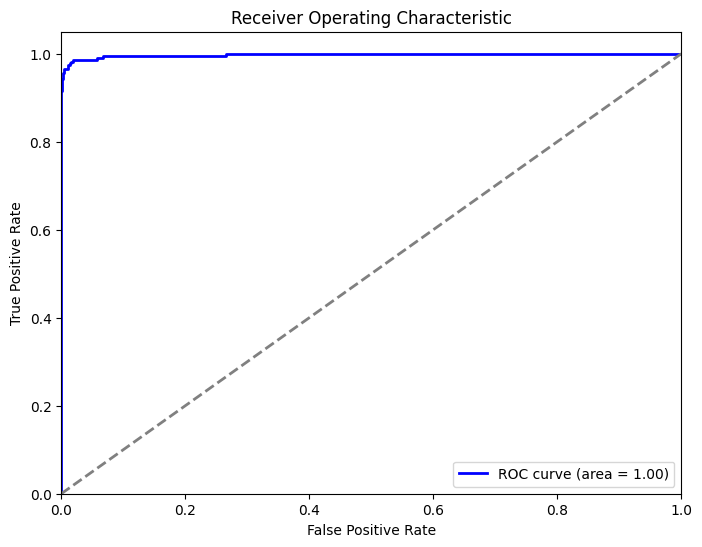

In [19]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

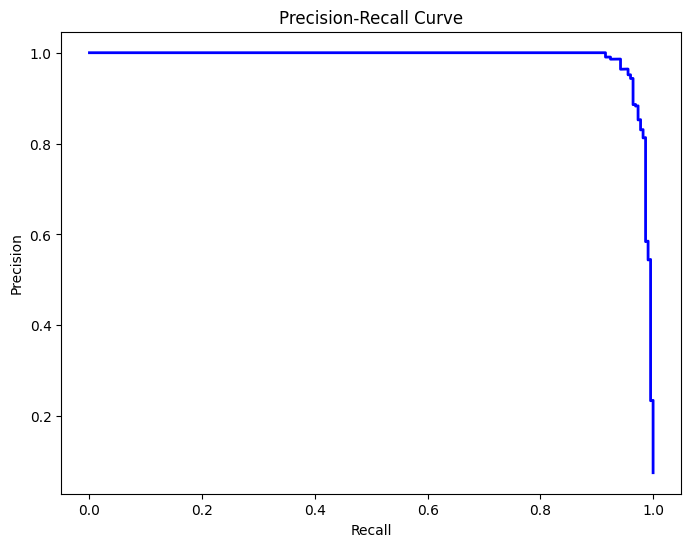

In [20]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

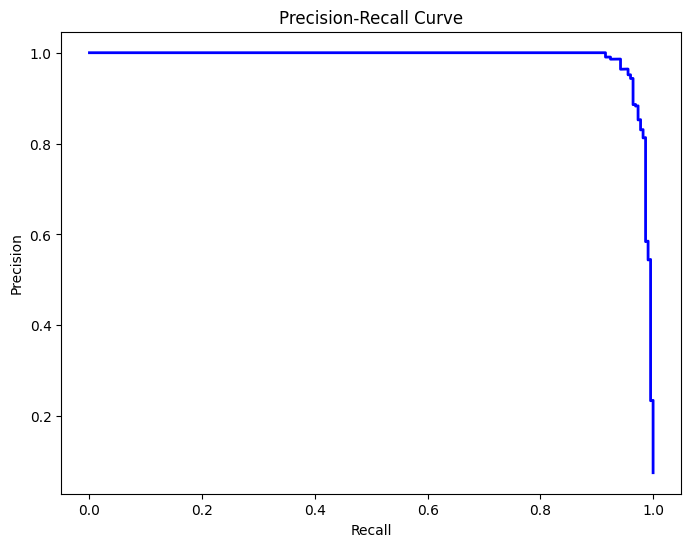

In [21]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

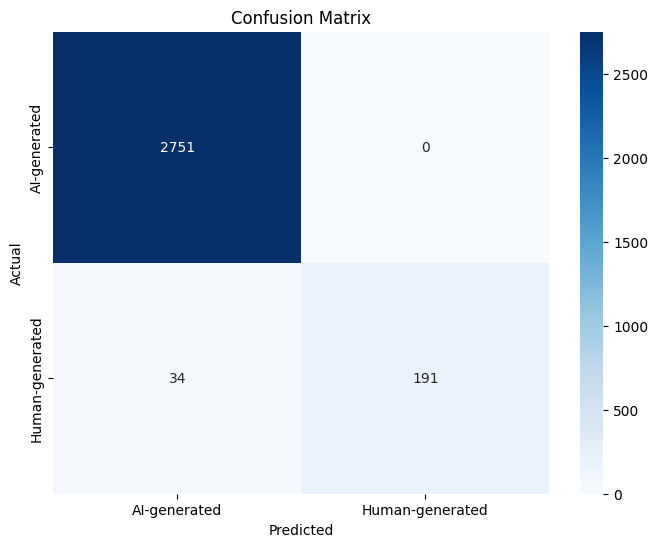

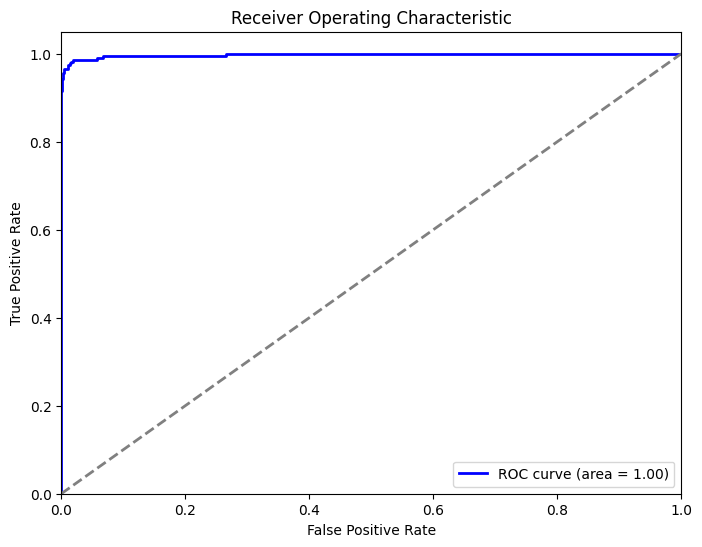

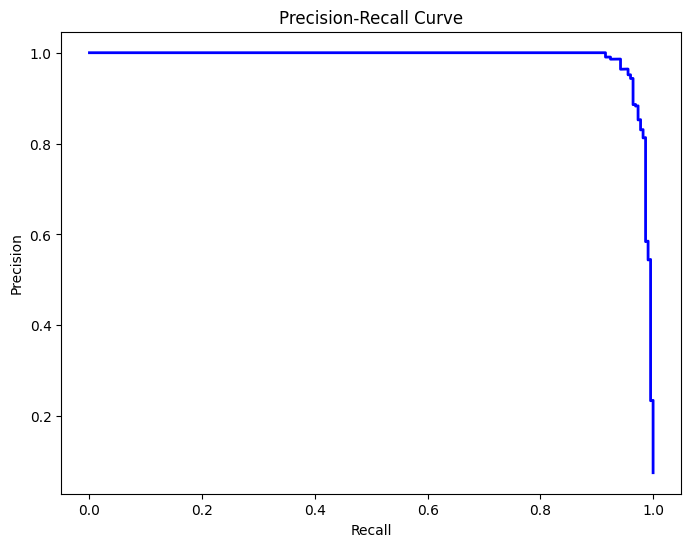

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['AI-generated', 'Human-generated'], yticklabels=['AI-generated', 'Human-generated'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [23]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/datasets/train_essays_7_prompts_v2.csv'
data = pd.read_csv(file_path)

# Function to get sample essays
def get_sample_essays(data, label, num_samples=3):
    samples = data[data['label'] == label].sample(n=num_samples, random_state=42)
    return samples['text'].tolist()

# Get sample AI-generated essays
ai_generated_samples = get_sample_essays(data, label=0, num_samples=3)
print("Sample AI-generated Essays:")
for i, essay in enumerate(ai_generated_samples, 1):
    print(f"\nEssay {i}:\n{essay}\n")

# Get sample human-generated essays
human_generated_samples = get_sample_essays(data, label=1, num_samples=3)
print("Sample Human-generated Essays:")
for i, essay in enumerate(human_generated_samples, 1):
    print(f"\nEssay {i}:\n{essay}\n")

Sample AI-generated Essays:

Essay 1:
INTRODUCTION

The Mona Lisa is one paint that is famous in the world, according to some new computer software can reconise emotions in people, this system is a innovation of Prof. Thomas Haung, of the Beckman and is working with Prof. Nicu Sebe, they will have help from Dr. Paul Eckman institute of Advanced Science at the University of Illinois man, creator crator of FACS.

BODY

This system has some questions that people thikn, howcan a computer recognize subtle facial movements we humans use to express how we feel? Dr. Haung said that the procces begins when the computer structs a 3-D computer model of the face; all 44 major muscles in the model must move like human muscles. Dr. Eckman has classified six basic emotions- happiness, surprise, anger, disgust, fear, and sadness - and then assosiated each with characteristic movements of the facial muscles. "The facial expressions for each emotion are universal" observes Dr. Haung.

A classroom comput

In [24]:
# Function to preprocess and predict
def predict_essay(text):
    # Preprocess the text
    text_transformed = tfidf_vectorizer.transform([text])

    # Make a prediction
    prediction = model.predict(text_transformed)

    # Map prediction to label
    label_map = {0: 'AI-generated', 1: 'Human-generated'}
    return label_map[prediction[0]]

In [ ]:
# Save the model for later use
import joblib

# Save the model
joblib.dump(model, 'logistic_regression_model.joblib')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Model and TF-IDF vectorizer saved successfully.")


In [4]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import joblib
# Load the saved model and vectorizer
loaded_model = joblib.load('D:/Projects/LLM-AI-generated-Text-Detection/model_saves/logistic_regression_model.joblib')
loaded_vectorizer = joblib.load('D:/Projects/LLM-AI-generated-Text-Detection/model_saves/tfidf_vectorizer.joblib')

# Function to predict using the loaded model
def predict_new_essay(text):
    # Preprocess the text using the loaded vectorizer
    text_transformed = loaded_vectorizer.transform([text])
    
    # Make a prediction using the loaded model
    prediction = loaded_model.predict(text_transformed)
    
    # Map prediction to label
    label_map = {0: 'AI-generated', 1: 'Human-generated'}
    return label_map[prediction[0]]

# Test the loaded model with a new essay
new_essay = """ Cricket is a good sport to play in the summer time. It cannot be played in the rainy time because the pitch will be wet"""

prediction = predict_new_essay(new_essay)
print(f"The Text is predicted to be: {prediction}")

The Text is predicted to be: AI-generated


In [5]:
import requests

response = requests.post('http://127.0.0.1:8000/api/predict/', json={'text': 'Your text here'})
print(response.json())


JSONDecodeError: Expecting value: line 1 column 1 (char 0)